In [2]:
import pandas as pd 
import matplotlib.pyplot as plt

# Home Prices Data

In [3]:
data = pd.read_csv('data.csv', encoding='UTF-16', delimiter='\t')

In [4]:
data.head

<bound method NDFrame.head of               Region Month of Period End Median Sale Price  \
0        Atlanta, GA              18-Jan             $251K   
1        Atlanta, GA              18-Feb             $246K   
2        Atlanta, GA              18-Mar             $267K   
3        Atlanta, GA              18-Apr             $279K   
4        Atlanta, GA              18-May             $295K   
..               ...                 ...               ...   
403  St. Charles, MO              23-Apr             $330K   
404  St. Charles, MO              23-May             $338K   
405  St. Charles, MO              23-Jun             $335K   
406  St. Charles, MO              23-Jul             $327K   
407  St. Charles, MO              23-Aug             $340K   

    Median Sale Price MoM  Inventory Inventory MoM   Supply  
0                  -13.40%     2,855         -1.60%     4.2  
1                   -2.20%     2,955          3.50%     3.7  
2                    8.80%     3,073   

In [5]:
data.columns

Index(['Region', 'Month of Period End', 'Median Sale Price',
       'Median Sale Price MoM ', 'Inventory', 'Inventory MoM ', 'Supply'],
      dtype='object')

In [6]:
# Checking for missing values in the data_df dataset
missing_values_data_df = data.isnull().sum()
missing_values_data_df

Region                    0
Month of Period End       0
Median Sale Price         0
Median Sale Price MoM     0
Inventory                 0
Inventory MoM             0
Supply                    0
dtype: int64

In [7]:
data_types_data_df = data.dtypes
data_types_data_df

Region                     object
Month of Period End        object
Median Sale Price          object
Median Sale Price MoM      object
Inventory                  object
Inventory MoM              object
Supply                    float64
dtype: object

In [8]:
data.rename(columns={
    'Median Sale Price MoM ': 'Median Sale Price MoM',
    'Inventory MoM ': 'Inventory MoM'
},inplace=True)

In [9]:
# Cleaning the data 

# Remove $ and commas, change K to 000, convert to integer
data['Median Sale Price'] = data['Median Sale Price'].str.replace('$','').str.replace('K','000').str.replace(',','').astype(int)

# Remove % and convert to float
data['Median Sale Price MoM'] = data['Median Sale Price MoM'].str.replace('%','').astype(float)/100
data['Inventory MoM'] = data['Inventory MoM'].str.replace('%','').astype(float)/100

# Remove commas and convert to integer
data['Inventory'] = data['Inventory'].str.replace(',','').astype(int)

#Convert to float
data['Supply'] = data['Supply'].astype(float)


<ipython-input-9-42df905ca8ba>:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  data['Median Sale Price'] = data['Median Sale Price'].str.replace('$','').str.replace('K','000').str.replace(',','').astype(int)


In [10]:
data.head()

,Region,Month of Period End,Median Sale Price,Median Sale Price MoM,Inventory,Inventory MoM,Supply
0,"Atlanta, GA",18-Jan,251000,-0.134,2855,-0.016,4.2
1,"Atlanta, GA",18-Feb,246000,-0.022,2955,0.035,3.7
2,"Atlanta, GA",18-Mar,267000,0.088,3073,0.040,2.8
3,"Atlanta, GA",18-Apr,279000,0.047,3198,0.041,3.2
4,"Atlanta, GA",18-May,295000,0.055,3346,0.046,2.7


In [11]:
# Checking for and removing duplicate rows in the data_df dataset
initial_row_count = len(data)
data = data.drop_duplicates()

# Calculating the number of duplicate rows removed
duplicate_rows_removed = initial_row_count - len(data)

duplicate_rows_removed

0

In [12]:
#basic statistics 
statistics = data.describe() 

In [13]:
statistics

,Median Sale Price,Median Sale Price MoM,Inventory,Inventory MoM,Supply
count,408.000000,408.000000,408.000000,408.000000,408.000000
mean,311125.000000,0.007681,1073.536765,0.003103,2.224020
std,85450.800894,0.055030,1235.401226,0.111864,1.183615
min,139000.000000,-0.155000,40.000000,-0.303000,0.400000
25%,249750.000000,-0.026000,219.750000,-0.061500,1.400000
50%,308000.000000,0.000000,587.500000,0.008500,2.000000
75%,375000.000000,0.044000,1347.750000,0.068000,2.800000
max,523000.000000,0.168000,5212.000000,0.520000,6.800000


In [14]:
# Checking for unique values in the 'Region' column to ensure data consistency
regions = data['Region'].unique() 

In [15]:
regions

array(['Atlanta, GA', 'Marietta, GA', 'Minneapolis, MN', 'Lakeville, MN',
       'St. Louis, MO', 'St. Charles, MO'], dtype=object)

In [16]:
# Convert the 'Month of Period End' column to datetime format (if not already)
data['Month of Period End'] = pd.to_datetime(data['Month of Period End'], format='%y-%b')

# Reformat the datetime column to the desired format "M/YYYY"
data['Month of Period End'] = data['Month of Period End'].dt.strftime('%-m/%Y')

# Displaying the first few rows to verify the changes
data_df_head_updated_format = data.head()
data_df_head_updated_format

,Region,Month of Period End,Median Sale Price,Median Sale Price MoM,Inventory,Inventory MoM,Supply
0,"Atlanta, GA",2018-01-01 00:00:00,251000,-0.134,2855,-0.016,4.2
1,"Atlanta, GA",2018-02-01 00:00:00,246000,-0.022,2955,0.035,3.7
2,"Atlanta, GA",2018-03-01 00:00:00,267000,0.088,3073,0.040,2.8
3,"Atlanta, GA",2018-04-01 00:00:00,279000,0.047,3198,0.041,3.2
4,"Atlanta, GA",2018-05-01 00:00:00,295000,0.055,3346,0.046,2.7


# Interested Rate

In [17]:
IR = pd.read_csv('Monthly Interested Rate.csv')

In [18]:
IR.head()

,DATE,MORTGAGE30US
0,1/1/2018,4.0325
1,2/1/2018,4.33
2,3/1/2018,4.444
3,4/1/2018,4.4675
4,5/1/2018,4.586


In [19]:
# Checking for missing values in the IR dataset
missing_values_IR = IR.isnull().sum()
missing_values_IR

DATE            0
MORTGAGE30US    0
dtype: int64

In [20]:
# Checking the data types of the columns in the IR dataset
data_types_IR = IR.dtypes
data_types_IR

DATE            object
MORTGAGE30US    object
dtype: object

In [21]:
# Converting 'DATE' to datetime format
IR['DATE'] = pd.to_datetime(IR['DATE'])

In [22]:
IR1 = IR[(IR['DATE'] >= '2018-01-01')]

In [23]:
IR1.head()

,DATE,MORTGAGE30US
0,2018-01-01,4.0325
1,2018-02-01,4.33
2,2018-03-01,4.444
3,2018-04-01,4.4675
4,2018-05-01,4.586


# Merge 2 datasets

In [24]:
# Convert 'DATE' in interest_rate_df to the same format as 'Month of Period End' in data_df
IR['DATE'] = IR['DATE'].dt.strftime('%-m/%Y')

In [25]:
# Merging the two dataframes on the date columns
merged_df = pd.merge(data, IR, left_on='Month of Period End', right_on='DATE', how='left')

# Drop the redundant 'DATE' column from the merged dataframe
merged_df.drop('DATE', axis=1, inplace=True)

# Display the first few rows of the merged dataframe
merged_df_head = merged_df.head()
merged_df_head

,Region,Month of Period End,Median Sale Price,Median Sale Price MoM,Inventory,Inventory MoM,Supply,MORTGAGE30US
0,"Atlanta, GA",2018-01-01 00:00:00,251000,-0.134,2855,-0.016,4.2,4.0325
1,"Atlanta, GA",2018-02-01 00:00:00,246000,-0.022,2955,0.035,3.7,4.33
2,"Atlanta, GA",2018-03-01 00:00:00,267000,0.088,3073,0.040,2.8,4.444
3,"Atlanta, GA",2018-04-01 00:00:00,279000,0.047,3198,0.041,3.2,4.4675
4,"Atlanta, GA",2018-05-01 00:00:00,295000,0.055,3346,0.046,2.7,4.586


In [26]:
# Renaming the 'MORTGAGE30US' column to 'Mortgage Interested Rate 30'
merged_df.rename(columns={'MORTGAGE30US': 'Mortgage Interested Rate 30'}, inplace=True)

# Displaying the first few rows to verify the changes
merged_df_head_renamed = merged_df.head()
merged_df_head_renamed

,Region,Month of Period End,Median Sale Price,Median Sale Price MoM,Inventory,Inventory MoM,Supply,Mortgage Interested Rate 30
0,"Atlanta, GA",2018-01-01 00:00:00,251000,-0.134,2855,-0.016,4.2,4.0325
1,"Atlanta, GA",2018-02-01 00:00:00,246000,-0.022,2955,0.035,3.7,4.33
2,"Atlanta, GA",2018-03-01 00:00:00,267000,0.088,3073,0.040,2.8,4.444
3,"Atlanta, GA",2018-04-01 00:00:00,279000,0.047,3198,0.041,3.2,4.4675
4,"Atlanta, GA",2018-05-01 00:00:00,295000,0.055,3346,0.046,2.7,4.586


In [27]:
merged_df.tail()

,Region,Month of Period End,Median Sale Price,Median Sale Price MoM,Inventory,Inventory MoM,Supply,Mortgage Interested Rate 30
403,"St. Charles, MO",2023-04-01 00:00:00,330000,0.009,69,-0.159,0.8,6.3425
404,"St. Charles, MO",2023-05-01 00:00:00,338000,0.023,79,0.145,0.8,6.425
405,"St. Charles, MO",2023-06-01 00:00:00,335000,-0.007,111,0.405,0.9,6.714
406,"St. Charles, MO",2023-07-01 00:00:00,327000,-0.025,109,-0.018,0.9,6.84
407,"St. Charles, MO",2023-08-01 00:00:00,340000,0.041,108,-0.009,0.8,7.072


In [28]:
merged_df.to_csv('House_IR.csv', index=False)

# Merging 4 datasets

In [30]:
job_opening_df = pd.read_csv("Job Opening.csv")
consumer_price_df = pd.read_csv("CPI Rate.csv")

# Converting 'DATE' to datetime format
job_opening_df['DATE'] = pd.to_datetime(job_opening_df['DATE'])

consumer_price_df['DATE'] = pd.to_datetime(consumer_price_df['DATE'])


In [31]:
# Convert 'DATE' in interest_rate_df to the same format as 'Month of Period End' in data_df
job_opening_df['DATE'] = job_opening_df['DATE'].dt.strftime('%-m/%Y')

consumer_price_df['DATE'] = consumer_price_df['DATE'].dt.strftime('%-m/%Y')

In [32]:
# Merging the two dataframes on the date columns
merged_df2 = pd.merge(merged_df, job_opening_df , left_on='Month of Period End', right_on='DATE', how='left')

# Drop the redundant 'DATE' column from the merged dataframe
merged_df2.drop('DATE', axis=1, inplace=True)

# Display the first few rows of the merged dataframe
merged_df2_head = merged_df2.head()
merged_df2_head

,Region,Month of Period End,Median Sale Price,Median Sale Price MoM,Inventory,Inventory MoM,Supply,Mortgage Interested Rate 30,Year,JTS2300JOL
0,"Atlanta, GA",2018-01-01 00:00:00,251000,-0.134,2855,-0.016,4.2,4.0325,2018,250
1,"Atlanta, GA",2018-02-01 00:00:00,246000,-0.022,2955,0.035,3.7,4.33,2018,218
2,"Atlanta, GA",2018-03-01 00:00:00,267000,0.088,3073,0.040,2.8,4.444,2018,223
3,"Atlanta, GA",2018-04-01 00:00:00,279000,0.047,3198,0.041,3.2,4.4675,2018,223
4,"Atlanta, GA",2018-05-01 00:00:00,295000,0.055,3346,0.046,2.7,4.586,2018,266


In [33]:
# Merging the two dataframes on the date columns
merged_df3 = pd.merge(merged_df2, consumer_price_df , left_on='Month of Period End', right_on='DATE', how='left')

# Drop the redundant 'DATE' column from the merged dataframe
merged_df3.drop('DATE', axis=1, inplace=True)

# Display the first few rows of the merged dataframe
merged_df3_head = merged_df3.head()
merged_df3_head

,Region,Month of Period End,Median Sale Price,Median Sale Price MoM,Inventory,Inventory MoM,Supply,Mortgage Interested Rate 30,Year,JTS2300JOL,USACPALTT01CTGYM
0,"Atlanta, GA",2018-01-01 00:00:00,251000,-0.134,2855,-0.016,4.2,4.0325,2018,250,2.042188
1,"Atlanta, GA",2018-02-01 00:00:00,246000,-0.022,2955,0.035,3.7,4.33,2018,218,2.175117
2,"Atlanta, GA",2018-03-01 00:00:00,267000,0.088,3073,0.040,2.8,4.444,2018,223,2.321361
3,"Atlanta, GA",2018-04-01 00:00:00,279000,0.047,3198,0.041,3.2,4.4675,2018,223,2.406737
4,"Atlanta, GA",2018-05-01 00:00:00,295000,0.055,3346,0.046,2.7,4.586,2018,266,2.725657


In [34]:
# Rename columns
merged_df3.rename(columns={'JTS2300JOL': 'Job Opening in Construction'}, inplace=True)

merged_df3.rename(columns={'USACPALTT01CTGYM': 'CPI'}, inplace=True)

In [35]:
merged_df3.head()

,Region,Month of Period End,Median Sale Price,Median Sale Price MoM,Inventory,Inventory MoM,Supply,Mortgage Interested Rate 30,Year,Job Opening in Construction,CPI
0,"Atlanta, GA",2018-01-01 00:00:00,251000,-0.134,2855,-0.016,4.2,4.0325,2018,250,2.042188
1,"Atlanta, GA",2018-02-01 00:00:00,246000,-0.022,2955,0.035,3.7,4.33,2018,218,2.175117
2,"Atlanta, GA",2018-03-01 00:00:00,267000,0.088,3073,0.040,2.8,4.444,2018,223,2.321361
3,"Atlanta, GA",2018-04-01 00:00:00,279000,0.047,3198,0.041,3.2,4.4675,2018,223,2.406737
4,"Atlanta, GA",2018-05-01 00:00:00,295000,0.055,3346,0.046,2.7,4.586,2018,266,2.725657


In [36]:
merged_df3.to_csv('Merged_DF.csv', index=False)

In [37]:
# Filtering the dataset for the years 2018-2019
filtered_df = merged_df3[merged_df3['Year'].isin([2018, 2019, 2020, 2021, 2022, 2023])]

# Grouping by Region and Year to get the average median sale price and interest rate for each year
grouped_df = filtered_df.groupby(['Region', 'Year']).agg({
    'Median Sale Price': 'mean',
    'Inventory': 'mean',
    'Supply': 'mean',
    'Mortgage Interested Rate 30': 'mean',
    'Job Opening in Construction': 'mean',
    'CPI' : 'mean'
}).reset_index()

grouped_df.head()

DataError: No numeric types to aggregate

In [ ]:
grouped_df.to_csv('Grouped Data1.csv', index=False)

# Compare before and after Covid-19 
## Relationship between Home Price vs Interest Rate

In [29]:
# Extracting the year from the 'Month of Period End' column and adding it as a new column
merged_df['Year'] = pd.to_datetime(merged_df['Month of Period End']).dt.year

In [38]:
merged_df.columns

Index(['Region', 'Month of Period End', 'Median Sale Price',
       'Median Sale Price MoM', 'Inventory', 'Inventory MoM', 'Supply',
       'Mortgage Interested Rate 30', 'Year'],
      dtype='object')

In [39]:
merged_df.dtypes

Region                          object
Month of Period End             object
Median Sale Price                int32
Median Sale Price MoM          float64
Inventory                        int32
Inventory MoM                  float64
Supply                         float64
Mortgage Interested Rate 30     object
Year                             int64
dtype: object

In [40]:
# Convert 'Mortgage Interested Rate 30' column to a float data type
merged_df['Mortgage Interested Rate 30'] = pd.to_numeric(merged_df['Mortgage Interested Rate 30'], errors='coerce')

In [41]:
# Filtering the dataset for the years 2018-2019
filtered_df_2018_2019 = merged_df[merged_df['Year'].isin([2018, 2019])]

# Grouping by Region and Year to get the average median sale price and interest rate for each year
SaleIR_grouped_df_2018_2019 = filtered_df_2018_2019.groupby(['Region', 'Year']).agg({
    'Median Sale Price': 'median',
    'Mortgage Interested Rate 30': 'mean'
}).reset_index()

SaleIR_grouped_df_2018_2019.head()

,Region,Year,Median Sale Price,Mortgage Interested Rate 30
0,"Atlanta, GA",2018,287500,4.539042
1,"Atlanta, GA",2019,306500,3.933750
2,"Lakeville, MN",2018,352500,4.539042
3,"Lakeville, MN",2019,370000,3.933750
4,"Marietta, GA",2018,279000,4.539042


In [42]:
# Filtering the dataset for the years 2020-2021
filtered_df_2020_2021 = merged_df[merged_df['Year'].isin([2020, 2021])]

# Grouping by Region and Year to get the average median sale price and interest rate for each year
SaleIR_grouped_df_2020_2021 = filtered_df_2020_2021.groupby(['Region', 'Year']).agg({
    'Median Sale Price': 'median',
    'Mortgage Interested Rate 30': 'mean'
}).reset_index()

SaleIR_grouped_df_2020_2021.head()

,Region,Year,Median Sale Price,Mortgage Interested Rate 30
0,"Atlanta, GA",2020,346500,3.113667
1,"Atlanta, GA",2021,373500,2.955708
2,"Lakeville, MN",2020,393000,3.113667
3,"Lakeville, MN",2021,435500,2.955708
4,"Marietta, GA",2020,325500,3.113667


In [43]:
# Filtering the dataset for the years 2022-2023
filtered_df_2022_2023 = merged_df[merged_df['Year'].isin([2022,2023])]

# Grouping by Region and Year to get the average median sale price and interest rate for each year
SaleIR_grouped_df_2022_2023 = filtered_df_2022_2023.groupby(['Region', 'Year']).agg({
    'Median Sale Price': 'median',
    'Mortgage Interested Rate 30': 'mean'
}).reset_index()

SaleIR_grouped_df_2022_2023.tail()

,Region,Year,Median Sale Price,Mortgage Interested Rate 30
7,"Minneapolis, MN",2023,340500,6.558438
8,"St. Charles, MO",2022,304000,5.327500
9,"St. Charles, MO",2023,328500,6.558438
10,"St. Louis, MO",2022,205000,5.327500
11,"St. Louis, MO",2023,225500,6.558438


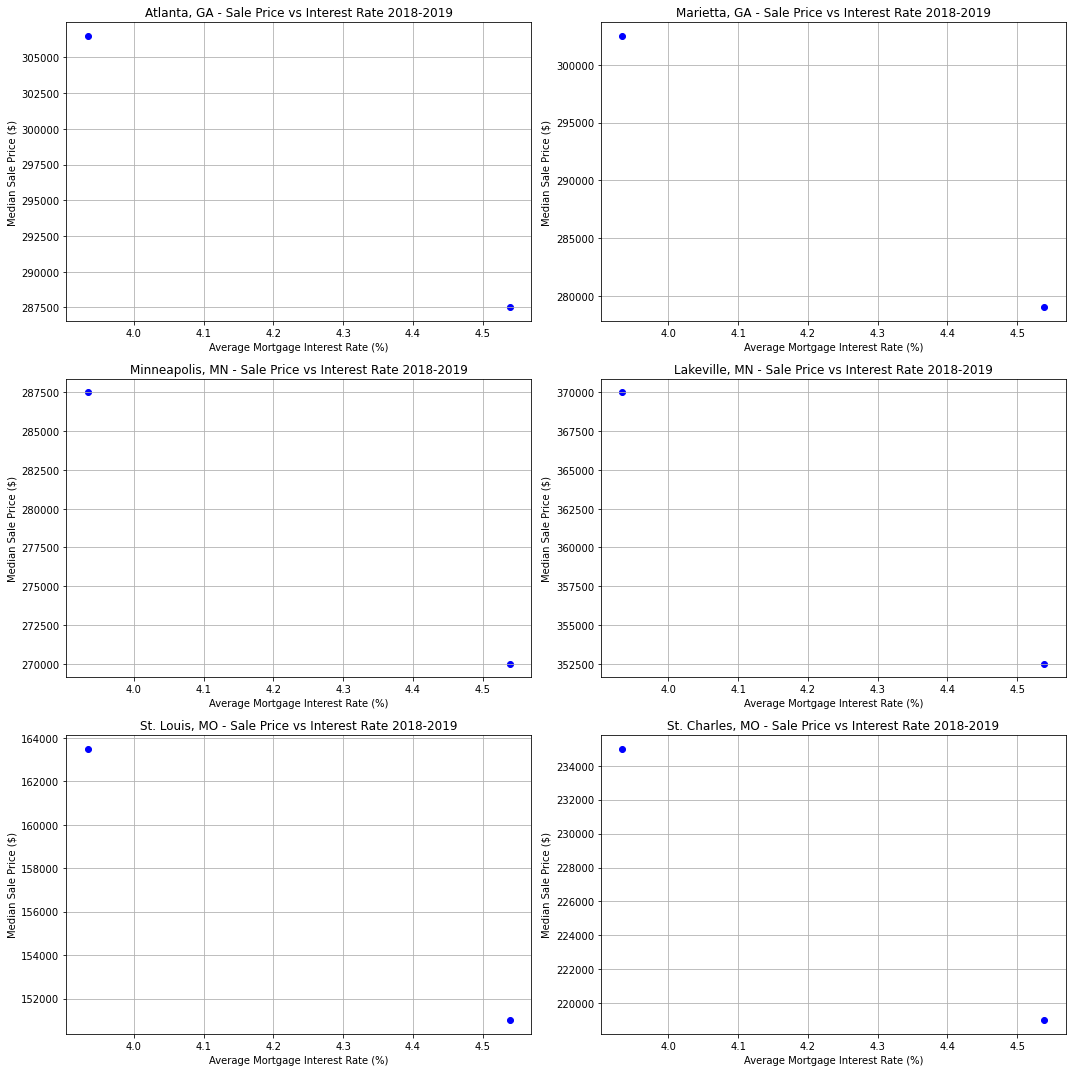

In [44]:
# Dynamically determining the subplot dimensions
n_regions = len(regions)
n_cols = 2
n_rows = int(n_regions / n_cols) + (n_regions % n_cols)

# Plotting scatter plots for each region
plt.figure(figsize=(15, 5 * n_rows))

for idx, region in enumerate(regions, 1):
    region_data = SaleIR_grouped_df_2018_2019[SaleIR_grouped_df_2018_2019['Region'] == region]
    
    # Creating a subplot for each region
    plt.subplot(n_rows, n_cols, idx)
    
    plt.scatter(region_data['Mortgage Interested Rate 30'], region_data['Median Sale Price'], color='blue', label=region)
    plt.title(f"{region} - Sale Price vs Interest Rate 2018-2019")
    plt.xlabel("Average Mortgage Interest Rate (%)")
    plt.ylabel("Median Sale Price ($)")
    plt.grid(True)

plt.tight_layout()
plt.show()


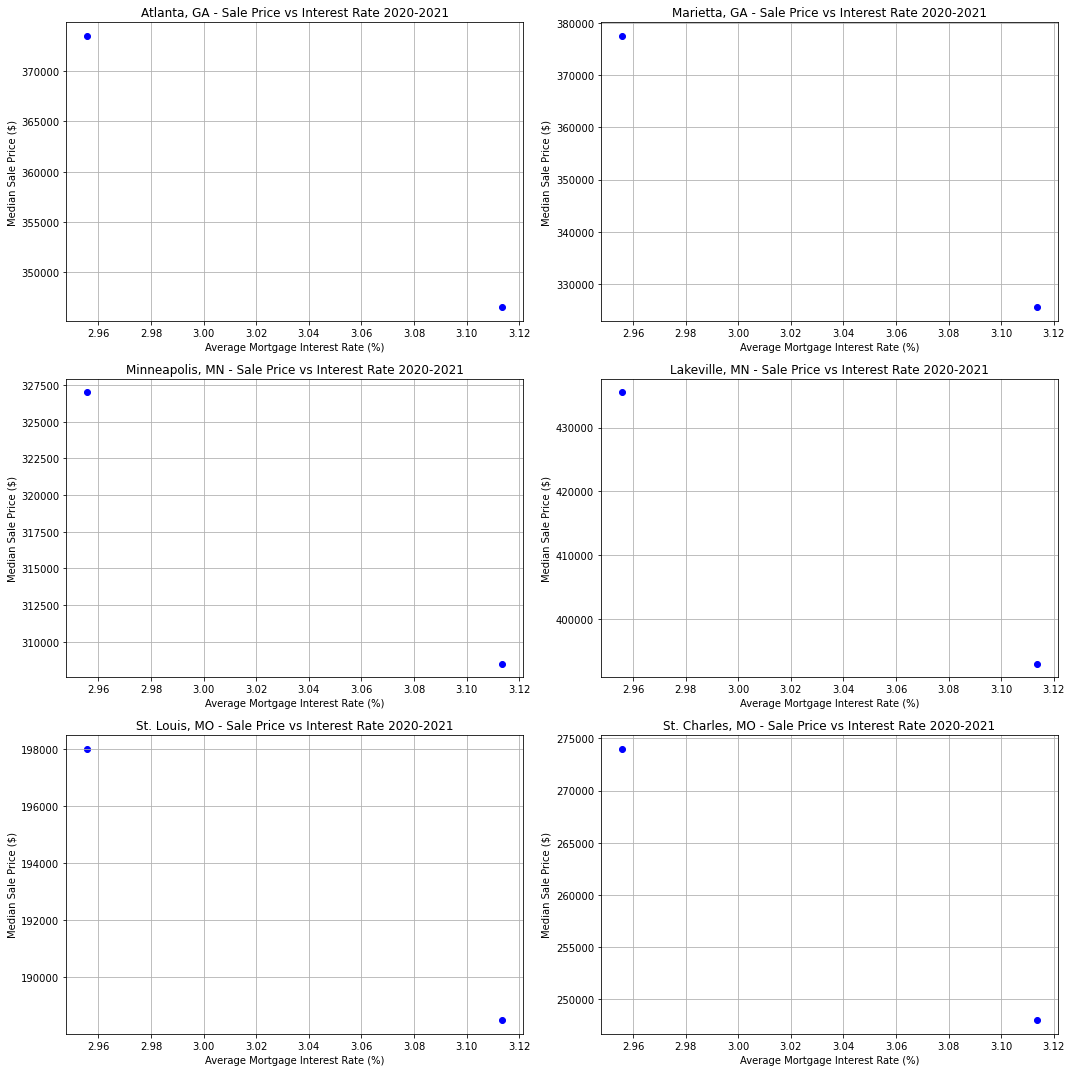

In [45]:
# Dynamically determining the subplot dimensions
n_regions = len(regions)
n_cols = 2
n_rows = int(n_regions / n_cols) + (n_regions % n_cols)

# Plotting scatter plots for each region
plt.figure(figsize=(15, 5 * n_rows))

for idx, region in enumerate(regions, 1):
    region_data = SaleIR_grouped_df_2020_2021[SaleIR_grouped_df_2020_2021['Region'] == region]
    
    # Creating a subplot for each region
    plt.subplot(n_rows, n_cols, idx)
    
    plt.scatter(region_data['Mortgage Interested Rate 30'], region_data['Median Sale Price'], color='blue', label=region)
    plt.title(f"{region} - Sale Price vs Interest Rate 2020-2021")
    plt.xlabel("Average Mortgage Interest Rate (%)")
    plt.ylabel("Median Sale Price ($)")
    plt.grid(True)

plt.tight_layout()
plt.show()

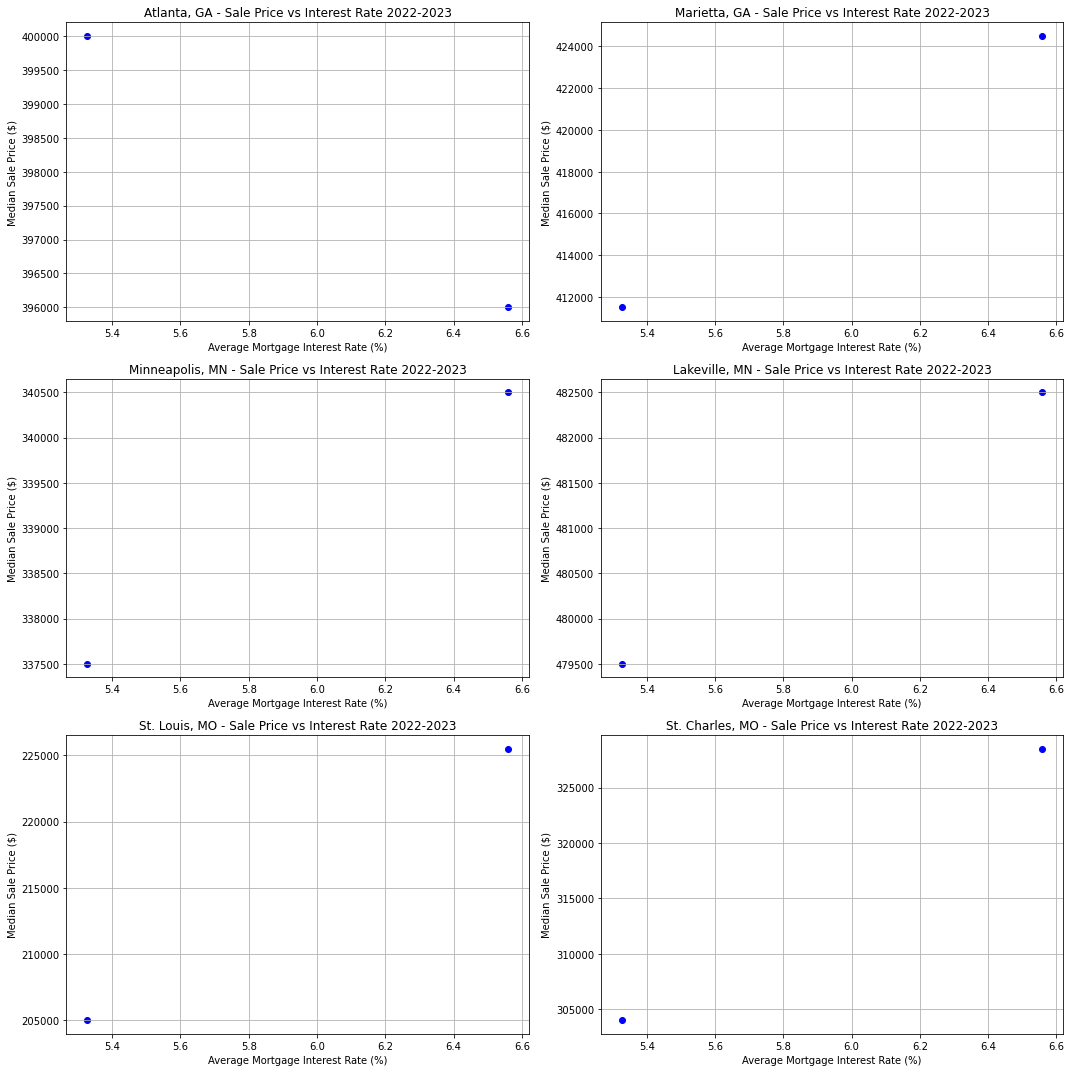

In [46]:
# Plotting scatter plots for each region
plt.figure(figsize=(15, 5 * n_rows))

for idx, region in enumerate(regions, 1):
    region_data = SaleIR_grouped_df_2022_2023[SaleIR_grouped_df_2022_2023['Region'] == region]
    
    # Creating a subplot for each region
    plt.subplot(n_rows, n_cols, idx)
    
    plt.scatter(region_data['Mortgage Interested Rate 30'], region_data['Median Sale Price'], color='blue', label=region)
    plt.title(f"{region} - Sale Price vs Interest Rate 2022-2023")
    plt.xlabel("Average Mortgage Interest Rate (%)")
    plt.ylabel("Median Sale Price ($)")
    plt.grid(True)

plt.tight_layout()
plt.show()

#### the interest rate increases, the median sale price seems to decrease or vice versa from 2018 - 2021
#### the interest rate increases, the median sale price seems to increase or decrease little bit from 2022 - 2023

In [47]:
# Calculate the correlation for each region
SaleIR_correlations_2018_2019 = {}

for region in regions:
    subset = SaleIR_grouped_df_2018_2019[SaleIR_grouped_df_2018_2019['Region'] == region]
    SaleIR_correlation_2018_2019 = subset[['Median Sale Price', 'Mortgage Interested Rate 30']].corr().iloc[0, 1]
    SaleIR_correlations_2018_2019[region] = SaleIR_correlation_2018_2019

SaleIR_correlations_2018_2019

{'Atlanta, GA': -0.9999999999999993,
 'Marietta, GA': -0.9999999999999993,
 'Minneapolis, MN': -0.9999999999999993,
 'Lakeville, MN': -0.9999999999999993,
 'St. Louis, MO': -0.9999999999999993,
 'St. Charles, MO': -0.9999999999999992}

In [48]:
# Calculate the correlation for each region
SaleIR_correlations_2020_2021 = {}

for region in regions:
    subset = SaleIR_grouped_df_2020_2021[SaleIR_grouped_df_2020_2021['Region'] == region]
    SaleIR_correlation_2020_2021 = subset[['Median Sale Price', 'Mortgage Interested Rate 30']].corr().iloc[0, 1]
    SaleIR_correlations_2020_2021[region] = SaleIR_correlation_2020_2021

SaleIR_correlations_2020_2021

{'Atlanta, GA': -1.0,
 'Marietta, GA': -1.0,
 'Minneapolis, MN': -1.0,
 'Lakeville, MN': -1.0,
 'St. Louis, MO': -1.0,
 'St. Charles, MO': -1.0}

In [49]:
# Calculate the correlation for each region
SaleIR_correlations_2022_2023 = {}

for region in regions:
    subset = SaleIR_grouped_df_2022_2023[SaleIR_grouped_df_2022_2023['Region'] == region]
    SaleIR_correlation_2022_2023 = subset[['Median Sale Price', 'Mortgage Interested Rate 30']].corr().iloc[0, 1]
    SaleIR_correlations_2022_2023[region] = SaleIR_correlation_2022_2023

SaleIR_correlations_2022_2023

{'Atlanta, GA': -1.0,
 'Marietta, GA': 1.0,
 'Minneapolis, MN': 1.0,
 'Lakeville, MN': 1.0,
 'St. Louis, MO': 1.0000000000000002,
 'St. Charles, MO': 1.0}

In [53]:
# Calculating the correlation between 'Median Sale Price' and 'Mortgage Interested Rate 30' for both time periods
correlation_2018_2019 = SaleIR_grouped_df_2018_2019['Median Sale Price'].corr(SaleIR_grouped_df_2018_2019['Mortgage Interested Rate 30'])
correlation_2022_2023 = SaleIR_grouped_df_2022_2023['Median Sale Price'].corr(SaleIR_grouped_df_2022_2023['Mortgage Interested Rate 30'])

correlation_2018_2019, correlation_2022_2023

(-0.13795886418670442, 0.05902599130027538)

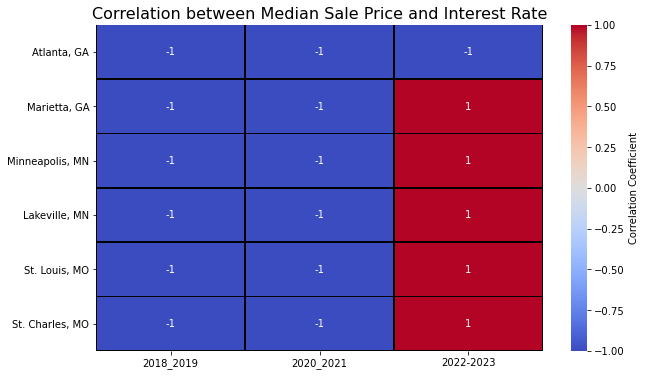

In [55]:
# Importing necessary libraries for plotting
import matplotlib.pyplot as plt
import seaborn as sns

# Creating a dataframe from the provided data
correlation_df = pd.DataFrame({
    '2018_2019': SaleIR_correlations_2018_2019,
    '2020_2021': SaleIR_correlations_2020_2021,
    '2022-2023': SaleIR_correlations_2022_2023
})
# Plotting the heatmap for the correlation data
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_df, annot=True, cmap='coolwarm', center=0, linewidths=0.5, linecolor='black', cbar_kws={'label': 'Correlation Coefficient'})
plt.title('Correlation between Median Sale Price and Interest Rate', fontsize=16)
plt.show()

# Relationship between Home Price vs Home Inventory

In [ ]:
# Grouping by Region and Year to get the average median sale price and interest rate for each year
grouped_df_2018_2019 = filtered_df_2018_2019.groupby(['Region', 'Year']).agg({
    'Median Sale Price': 'median',
    'Inventory': 'mean'
}).reset_index()

grouped_df_2018_2019.head()

In [ ]:
# Grouping by Region and Year to get the average median sale price and interest rate for each year
grouped_df_2020_2021 = filtered_df_2020_2021.groupby(['Region', 'Year']).agg({
    'Median Sale Price': 'median',
    'Inventory': 'mean'
}).reset_index()

grouped_df_2020_2021.head()

In [ ]:
# Grouping by Region and Year to get the average median sale price and interest rate for each year
grouped_df_2022_2023 = filtered_df_2022_2023.groupby(['Region', 'Year']).agg({
    'Median Sale Price': 'median',
    'Inventory': 'mean'
}).reset_index()

grouped_df_2022_2023.head()

In [ ]:
# Dynamically determining the subplot dimensions
n_regions = len(regions)
n_cols = 2
n_rows = int(n_regions / n_cols) + (n_regions % n_cols)

# Plotting scatter plots for each region
plt.figure(figsize=(15, 5 * n_rows))

for idx, region in enumerate(regions, 1):
    region_data = grouped_df_2018_2019[grouped_df_2018_2019['Region'] == region]
    
    # Creating a subplot for each region
    plt.subplot(n_rows, n_cols, idx)
    
    plt.scatter(region_data['Inventory'], region_data['Median Sale Price'], color='blue', label=region)
    plt.title(f"{region} - Sale Price vs Inventory 2018-2019")
    plt.xlabel("Average Inventory")
    plt.ylabel("Median Sale Price ($)")
    plt.grid(True)

plt.tight_layout()
plt.show()

In [ ]:
# Plotting scatter plots for each region
plt.figure(figsize=(15, 5 * n_rows))

for idx, region in enumerate(regions, 1):
    region_data = grouped_df_2020_2021[grouped_df_2020_2021['Region'] == region]
    
    # Creating a subplot for each region
    plt.subplot(n_rows, n_cols, idx)
    
    plt.scatter(region_data['Inventory'], region_data['Median Sale Price'], color='blue', label=region)
    plt.title(f"{region} - Sale Price vs Home Inventory 2020-2021")
    plt.xlabel("Average Inventory")
    plt.ylabel("Median Sale Price ($)")
    plt.grid(True)

plt.tight_layout()
plt.show()

In [ ]:
# Plotting scatter plots for each region
plt.figure(figsize=(15, 5 * n_rows))

for idx, region in enumerate(regions, 1):
    region_data = grouped_df_2022_2023[grouped_df_2022_2023['Region'] == region]
    
    # Creating a subplot for each region
    plt.subplot(n_rows, n_cols, idx)
    
    plt.scatter(region_data['Inventory'], region_data['Median Sale Price'], color='blue', label=region)
    plt.title(f"{region} - Sale Price vs Home Inventory 2022-2023")
    plt.xlabel("Average Inventory")
    plt.ylabel("Median Sale Price ($)")
    plt.grid(True)

plt.tight_layout()
plt.show()

In [ ]:
# Calculate the correlation for each region
correlations_2018_2019 = {}

for region in regions:
    subset = grouped_df_2018_2019[grouped_df_2018_2019['Region'] == region]
    correlation_2018_2019 = subset[['Median Sale Price', 'Inventory']].corr().iloc[0, 1]
    correlations_2018_2019[region] = correlation_2018_2019

correlations_2018_2019

In [ ]:
# Calculate the correlation for each region
correlations_2020_2021 = {}

for region in regions:
    subset = grouped_df_2020_2021[grouped_df_2020_2021['Region'] == region]
    correlation_2020_2021 = subset[['Median Sale Price', 'Inventory']].corr().iloc[0, 1]
    correlations_2020_2021[region] = correlation_2020_2021

correlations_2020_2021

In [ ]:
# Calculate the correlation for each region
correlations_2022_2023 = {}

for region in regions:
    subset = grouped_df_2022_2023 [grouped_df_2022_2023 ['Region'] == region]
    correlation_2022_2023  = subset[['Median Sale Price', 'Inventory']].corr().iloc[0, 1]
    correlations_2022_2023 [region] = correlation_2022_2023 

correlations_2022_2023 

In [ ]:
# Creating a dataframe from the provided data
correlation_df = pd.DataFrame({
    '2018-2019': correlations_2018_2019,
    '2020-2021': correlations_2020_2021,
    '2022-2023': correlations_2022_2023
})
# Plotting the heatmap for the correlation data
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_df, annot=True, cmap='coolwarm', center=0, linewidths=0.5, linecolor='black', cbar_kws={'label': 'Correlation Coefficient'})
plt.title('Correlation between Median Sale Price and Inventory', fontsize=16)
plt.show()

# Inflation data


In [ ]:
inflation = pd.read_csv('inflation.csv')

In [ ]:
inflation.head()

In [ ]:
missing_data = inflation.isnull()

In [ ]:
missing_data

In [ ]:
inflation['DATE'] = pd.to_datetime(inflation["DATE"])

In [ ]:
inflation.head()

In [ ]:
#Rename the FPCPITOTLZGUSA columns to Inflation
inflation.rename(columns = {'FPCPITOTLZGUSA':'Inflation in USA'}, inplace = True)

In [ ]:
inflation.head()

In [ ]:
# Convert 'DATE' in interest_rate_df to the same format as 'Month of Period End' in data_df
inflation['DATE'] = inflation['DATE'].dt.strftime('%-m/%Y')
